## Extract frames from video

In [1]:
# import os
import cv2
# Function to extract frames
def FrameCapture(path):
    # Path to video file
    vidObj = cv2.VideoCapture(path)
    count = 0    
    success = 1
    while success:
        success, image = vidObj.read()
        # Saves the frames with frame-count
        cv2.imwrite("/home/jhanvipatel/Downloads/poseestimation_mediapipe/SIDE_frames/frame%d.jpg" % count, image) 
        count += 1
# Driver Code
if __name__ == '__main__':
    FrameCapture("videoLateral.mp4")

error: OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


### Install mediapipe dependencies

In [1]:
!pip install mediapipe

You should consider upgrading via the '/home/jhanvipatel/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [2]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [3]:
import cv2
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imwrite('grayscale.jpg',img)
    return img

## Code to Extract Keypoints, Calculate Angles & store them to csv

In [6]:
import cv2
import glob
import pandas as pd
c = 0
        
#angle lists
filename_list = []
Distance_shoulderList = []
Distance_kneeList = []
Distance_KneeshoulderList = []
rightKneeAngleList = []
rightHipAngleList = []
leftkneeAngleList = []
leftHipAngleList = []

#iterate all frames
for file in glob.glob('SIDE_frames/*.jpg'):
    print("filename:",file)
    filename_list.append(file)
    img = cv2.imread(file)
    c = c + 1
    resize_and_show(img)
    detail_list = []
    # Run MediaPipe Pose and draw pose landmarks.
    with mp_pose.Pose(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        #image = cv2.imread('images/frame0.jpg')
        # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # Print nose landmark.
        image_hight, image_width, _ = img.shape
        #extract keypoints
        nose_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
        nose_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_width
        
        
        left_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
        left_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_hight
        right_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        right_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_hight


        left_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width
        left_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight
        right_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width
        right_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight
 

        
        left_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
        left_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight
        right_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
        right_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight
       
        left_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width
        left_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight
        right_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * image_width
        right_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * image_hight
        
        left_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * image_width
        left_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_hight
        right_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x * image_width
        right_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * image_hight
        
        left_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * image_width
        left_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * image_hight
        right_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width
        right_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_hight
        
        left_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width
        left_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight
        right_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * image_width
        right_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * image_hight
        
        #calculate distances required
        left_shoulder = [left_shoulderX,left_shoulderY]
        right_shoulder = [right_shoulderX,right_shoulderY]
        dis_LSRS = (math.dist(left_shoulder,right_shoulder))
        print("Distance_shoulder::", dis_LSRS)
        shoulder_center = dis_LSRS/2
        left_knee = [left_kneeX,left_kneeY]
        right_knee = [right_kneeX,right_kneeY]
        dis_LKRK = (math.dist(left_knee,right_knee))
        print("Distance_knee::", dis_LKRK)
        distance_kneeShoulder = dis_LKRK/dis_LSRS 
        print("Distance_Kneeshoulder::", distance_kneeShoulder)
        #append the distances
        Distance_shoulderList.append(dis_LSRS)
        Distance_kneeList.append(dis_LKRK)
        Distance_KneeshoulderList.append(distance_kneeShoulder)
#         Distance_KneeWristList.append(Distance_wrist_Knee)
        
        #angle calculus 
        def CalculateAngle(kp1,kp2,kp3,kp4,kp5,kp6):
            a = np.array([kp1, kp2])
            b = np.array([kp3, kp4])
            c = np.array([kp5, kp6])
            ba = a - b
            bc = c - b
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            return np.degrees(angle)

        def angleforShoulder(p1,p2,p5,p6,sp):
            a1 = np.array([p1,p2])
            b1 = np.array([p5,p6])
            c1 = np.array([sp])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateTrunkangle(p1,p2,sp,p5,p6):
            a1 = np.array([p1,p2])
            b1 = np.array([sp])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateHipangle(sp,p1,p2,p5,p6):
            a1 = np.array([sp])
            b1 = np.array([p1,p2])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)


        rightKneeAngle = CalculateAngle(right_hipX,right_hipY,right_kneeX,right_kneeY,right_footX,right_footY)
        print("rightKneeAngle:::: ",rightKneeAngle)
        rightKneeAngleList.append(rightKneeAngle)
        
        rightHipAngle = angleforShoulder(right_kneeX,right_kneeY,right_hipX,right_hipY,shoulder_center)
        print("rightHipAngle:",rightHipAngle)
        rightHipAngleList.append(rightHipAngle)

        
        leftkneeAngle = CalculateAngle(left_hipX,left_hipY,left_kneeX,left_kneeY,left_footX,left_footY)
        print("leftkneeAngle:::: ",leftkneeAngle)
        leftkneeAngleList.append(leftkneeAngle)
        
        leftHipAngle = angleforShoulder(left_kneeX,left_kneeY,left_hipX,left_hipY,shoulder_center)
        print("leftHipAngle:",leftHipAngle)
        leftHipAngleList.append(leftHipAngle)

        
        # Draw pose landmarks.
        print(f'Pose landmarks of {file}:')
        annotated_image = img.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        resize_and_show(annotated_image)
        print("---------------------------------------")
        
print("count:",c)
#create dictonary to save lists for angles & distance
data = {
    'image_name': filename_list,
    'Distance_knee': Distance_kneeList,
    'Distance_Kneeshoulder': Distance_KneeshoulderList,
    'rightKneeAngle' : rightKneeAngleList,
    'rightHipAngle' : rightHipAngleList,
    'leftkneeAngle' : leftkneeAngleList,
    'leftHipAngle' : leftHipAngleList
}
 
# Make data frame of above data
df = pd.DataFrame(data)
 
# append data frame to CSV file
df.to_csv('LateralDetails.csv', mode='a', index=False, header=False)
 
# print message
print("Data appended successfully.")

filename: SIDE_frames/frame95.jpg
Distance_shoulder:: 9.73180565497906
Distance_knee:: 5.566745101277738
Distance_Kneeshoulder:: 0.5720156462875559
rightKneeAngle::::  162.4179902051635
rightHipAngle: 112.20622171819176
leftkneeAngle::::  164.1045204255779
leftHipAngle: 110.75893089798123
Pose landmarks of SIDE_frames/frame95.jpg:
---------------------------------------
filename: SIDE_frames/frame54.jpg
Distance_shoulder:: 9.302109534905297
Distance_knee:: 5.98239703553124
Distance_Kneeshoulder:: 0.643122617840916
rightKneeAngle::::  162.7913121525471
rightHipAngle: 101.49905147032024
leftkneeAngle::::  166.81033460995758
leftHipAngle: 103.03707856230432
Pose landmarks of SIDE_frames/frame54.jpg:
---------------------------------------
filename: SIDE_frames/frame52.jpg
Distance_shoulder:: 21.950403583504485
Distance_knee:: 30.492044664764336
Distance_Kneeshoulder:: 1.3891336689444203
rightKneeAngle::::  137.79676522982777
rightHipAngle: 60.41734514458454
leftkneeAngle::::  121.45631119

Distance_shoulder:: 14.467015035359998
Distance_knee:: 8.636398792605718
Distance_Kneeshoulder:: 0.5969717161070752
rightKneeAngle::::  162.15289584311176
rightHipAngle: 112.16990649885405
leftkneeAngle::::  58.24779341048501
leftHipAngle: 110.56034697545174
Pose landmarks of SIDE_frames/frame117.jpg:
---------------------------------------
filename: SIDE_frames/frame60.jpg
Distance_shoulder:: 10.674289921841288
Distance_knee:: 3.6157962652498736
Distance_Kneeshoulder:: 0.338738809956003
rightKneeAngle::::  168.43487310774313
rightHipAngle: 112.51144461088403
leftkneeAngle::::  173.4826038583947
leftHipAngle: 111.91914900612825
Pose landmarks of SIDE_frames/frame60.jpg:
---------------------------------------
filename: SIDE_frames/frame118.jpg
Distance_shoulder:: 14.131348230843999
Distance_knee:: 14.535114072622155
Distance_Kneeshoulder:: 1.0285723510016456
rightKneeAngle::::  159.71444461500178
rightHipAngle: 112.34307728475636
leftkneeAngle::::  62.01866404891609
leftHipAngle: 109.0

Distance_shoulder:: 5.3515971380190805
Distance_knee:: 5.50532357425606
Distance_Kneeshoulder:: 1.0287253379266665
rightKneeAngle::::  162.50431801507142
rightHipAngle: 110.704958074147
leftkneeAngle::::  161.80498092802654
leftHipAngle: 109.19995498483176
Pose landmarks of SIDE_frames/frame85.jpg:
---------------------------------------
filename: SIDE_frames/frame62.jpg
Distance_shoulder:: 8.520725161373484
Distance_knee:: 2.6308597697383127
Distance_Kneeshoulder:: 0.308760078504191
rightKneeAngle::::  175.9522274792269
rightHipAngle: 117.87753828797712
leftkneeAngle::::  174.16855990020358
leftHipAngle: 116.48315401337528
Pose landmarks of SIDE_frames/frame62.jpg:
---------------------------------------
filename: SIDE_frames/frame34.jpg
Distance_shoulder:: 3.9638917010352865
Distance_knee:: 2.7370457092975995
Distance_Kneeshoulder:: 0.6904945734472866
rightKneeAngle::::  141.7448507019907
rightHipAngle: 157.64043534705797
leftkneeAngle::::  149.43601961624046
leftHipAngle: 151.271806

Distance_shoulder:: 9.434949768806135
Distance_knee:: 4.27683061407935
Distance_Kneeshoulder:: 0.4532965960475405
rightKneeAngle::::  164.47028479906888
rightHipAngle: 112.79325326865803
leftkneeAngle::::  166.3568536004092
leftHipAngle: 111.79009593999734
Pose landmarks of SIDE_frames/frame88.jpg:
---------------------------------------
filename: SIDE_frames/frame24.jpg
Distance_shoulder:: 8.6942583096289
Distance_knee:: 4.980959720825697
Distance_Kneeshoulder:: 0.5729022009053123
rightKneeAngle::::  175.46132384849008
rightHipAngle: 124.9350664520617
leftkneeAngle::::  172.65563924492892
leftHipAngle: 119.46688458919665
Pose landmarks of SIDE_frames/frame24.jpg:
---------------------------------------
filename: SIDE_frames/frame74.jpg
Distance_shoulder:: 8.3645623827632
Distance_knee:: 3.978132476863044
Distance_Kneeshoulder:: 0.47559361683532375
rightKneeAngle::::  179.93454223040717
rightHipAngle: 120.80139753070287
leftkneeAngle::::  176.31316533685492
leftHipAngle: 120.5870881647

Distance_shoulder:: 12.874646808948016
Distance_knee:: 6.57286491479511
Distance_Kneeshoulder:: 0.5105277847487746
rightKneeAngle::::  171.33319360842216
rightHipAngle: 133.8406925698532
leftkneeAngle::::  174.5970278993922
leftHipAngle: 125.80271026147688
Pose landmarks of SIDE_frames/frame26.jpg:
---------------------------------------
filename: SIDE_frames/frame14.jpg
Distance_shoulder:: 11.617562755712196
Distance_knee:: 4.091380936098052
Distance_Kneeshoulder:: 0.3521720538231116
rightKneeAngle::::  164.78329828378077
rightHipAngle: 116.82783450673783
leftkneeAngle::::  161.40895003719058
leftHipAngle: 113.05618137311235
Pose landmarks of SIDE_frames/frame14.jpg:
---------------------------------------
filename: SIDE_frames/frame42.jpg
Distance_shoulder:: 6.381474540557933
Distance_knee:: 17.88821650650253
Distance_Kneeshoulder:: 2.803147829363362
rightKneeAngle::::  125.11781191087839
rightHipAngle: 165.7102405443266
leftkneeAngle::::  145.15900087167344
leftHipAngle: 147.7372187

Distance_shoulder:: 13.266159499648664
Distance_knee:: 4.2652312540689366
Distance_Kneeshoulder:: 0.32151213425271236
rightKneeAngle::::  173.8979944679891
rightHipAngle: 126.12523270824367
leftkneeAngle::::  164.57070556576716
leftHipAngle: 117.94093036674656
Pose landmarks of SIDE_frames/frame0.jpg:
---------------------------------------
filename: SIDE_frames/frame110.jpg
Distance_shoulder:: 12.968389324538936
Distance_knee:: 8.000510904229047
Distance_Kneeshoulder:: 0.6169240222523539
rightKneeAngle::::  158.59394492878036
rightHipAngle: 109.87617695756408
leftkneeAngle::::  159.16876511619552
leftHipAngle: 106.8240026412354
Pose landmarks of SIDE_frames/frame110.jpg:
---------------------------------------
filename: SIDE_frames/frame121.jpg
Distance_shoulder:: 11.328333307699062
Distance_knee:: 11.607348159521903
Distance_Kneeshoulder:: 1.0246298236681661
rightKneeAngle::::  160.81054689328795
rightHipAngle: 113.34940141617214
leftkneeAngle::::  53.35878562396318
leftHipAngle: 113

Code to add header for csv 
1. read existing csv
2. add headerlist
3. save new csv

In [14]:
import pandas as pd  
# # read contents of csv file
# file = pd.read_csv("LateralDetails.csv")
  
# # adding header
# headerList =  HeaderList = ['image_name','Distance_Shoulder','Distance_knee','Distance_Kneeshoulder', 'rightKneeAngle','rightHipAngle','leftkneeAngle','leftHipAngle']
  
# # converting data frame to csv
# file.to_csv("file1.csv", header=headerList, index=False)
  
# display modified csv file
file2 = pd.read_csv("file1.csv")
print(file2)

    image_name  Distance_Shoulder  Distance_knee  \
0       54.jpg           5.982397       0.643123   
1       52.jpg          30.492045       1.389134   
2        2.jpg           3.746791       0.235616   
3      122.jpg           4.434821       0.351653   
4       71.jpg           6.874041       1.787959   
..         ...                ...            ...   
363     57.jpg          33.371132       1.534695   
364    103.jpg           8.261850       0.750414   
365    114.jpg           9.534152       0.777045   
366     86.jpg           4.141603       0.630938   
367     35.jpg           5.389357       1.157344   

                                 Distance_Kneeshoulder  rightKneeAngle  \
0    [[434.15903759002686, 231.06568336486816], [47...      162.791312   
1    [[205.3302047252655, 289.5834159851074], [246....      137.796765   
2    [[426.00920391082764, 306.91208839416504], [44...      172.852373   
3    [[423.61618852615356, 309.7114849090576], [453...      163.880918   
4    

<AxesSubplot: xlabel='image_name'>

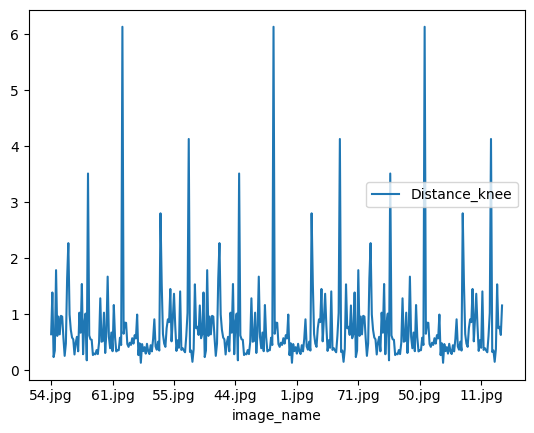

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('file1.csv')

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
df.plot(x = 'image_name', y = 'Distance_knee', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
# df.plot(x = 'image_name', y = 'rightKneeAngle', ax = ax, secondary_y = True)

In [25]:
df.head()

,image_name,Distance_shoulder,Distance_knee,Distance_Kneeshoulder,rightKneeAngle,rightHipAngle,rightTrunkAngle,rightShoulderAngle,rightElbowAngle,rightNeckAngle,leftkneeAngle,leftHipAngle,leftTrunkAngle,leftShoulderAngle,leftElbowAngle
0,pose_estimation/save_dir/frame54.jpg,54.955905,46.282627,0.842177,177.421110,111.560880,10.442324,33.331289,100.433976,5.620749,177.425314,116.680836,10.891589,167.016464,108.542922
1,pose_estimation/save_dir/frame52.jpg,56.289108,44.136765,0.784108,176.392037,108.421827,12.093364,14.613259,58.573358,2.373700,173.778987,112.002543,11.742511,135.429969,48.447551
2,pose_estimation/save_dir/frame2.jpg,61.644849,41.650600,0.675654,174.152715,113.871071,10.041981,95.030363,165.979487,6.532161,173.955368,115.968953,10.476847,115.261438,165.675413
3,pose_estimation/save_dir/frame71.jpg,64.534086,41.146499,0.637593,175.696166,112.909450,10.290711,94.122258,166.402004,5.570064,172.337010,113.949949,10.962630,124.968078,151.191157
4,pose_estimation/save_dir/frame25.jpg,65.075156,53.270392,0.818598,173.920651,107.706672,6.141332,102.924250,167.278247,9.995081,179.031323,120.770247,6.835448,138.697809,146.183300
